In [83]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import load_iris

In [113]:
class MultiDimensionalScaling:
    def __init__(self, method='metric', n_dimensions=2, learning_rate=0.5, eps=1e-3, max_iter=1000):
        self.method = method
        self.n_dimensions = n_dimensions
        self.lr = learning_rate
        self.eps = eps
        self.max_iter = max_iter
        
        self.B = None
        self.V = None
        self.Z = None
        self.distances: np.ndarray = None
        self.Z_distances: np.ndarray = None

    def fit(self, X):
        self.fit_transform(X)
        return self
    
    def fit_transform(self, X):
        self.distances = euclidean_distances(X)

        self.Z = np.random.multivariate_normal(np.zeros(self.n_dimensions), np.identity(self.n_dimensions), X.shape[0])
        self.Z_distances = euclidean_distances(self.Z)

        self.V = np.identity(X.shape[0])*X.shape[0] - 1
        
        for _ in range(self.max_iter):
            self.set_B()
            stress = self.stress()
            self.Z -= self.lr * self.gradient()
            if abs(stress - self.stress()) <= self.eps:
                break

        print('Iterations:', _ + 1)
        
        return self.Z

    def stress(self):
        self.Z_distances = euclidean_distances(self.Z)
        S2 = np.sqrt(np.sum(np.square(self.distances - self.Z_distances)))
        return S2

    def gradient(self):
        return 2 * self.V @ self.Z - 2 * self.B @ self.Z

    def set_B(self):
        self.B = - np.divide(self.distances, self.Z_distances, where=(self.Z_distances != 0))
        np.fill_diagonal(self.B, np.abs(self.B.sum(axis=1)))


Iterations: 574
26.727354460665897


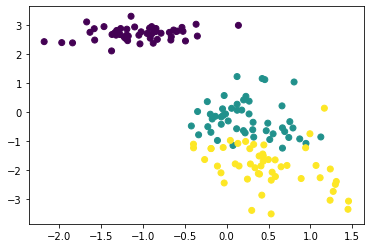

In [118]:
iris = load_iris()
x = iris['data']
y = iris['target']

model = MultiDimensionalScaling(n_dimensions=2, learning_rate=0.001)
x_transformed = model.fit_transform(x)

print(model.stress())

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], c=y)
plt.show()


Iterations: 915
4.057699981634976


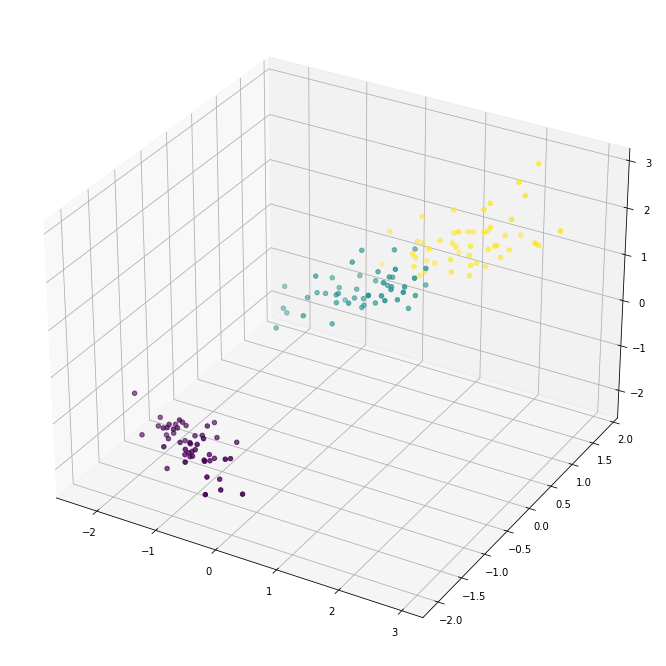

In [124]:

iris = load_iris()
x = iris['data']
y = iris['target']

model = MultiDimensionalScaling(n_dimensions=3, learning_rate=0.001)
x_transformed = model.fit_transform(x)

print(model.stress())

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_transformed[:, 0], x_transformed[:, 1], x_transformed[:, 2], c=y)
plt.show()
